In [12]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 87.0 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

import matplotlib.pyplot as plt

import pulp

In [31]:
from google.colab import files
uploaded = files.upload()  # Opens a file picker

Saving supply_chain_data.csv to supply_chain_data.csv


In [33]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['supply_chain_data.csv']))
print(data.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [34]:
print(data.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [35]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [36]:
data.shape

(100, 24)

There are 100 observations & 24 features

In [37]:
df= data
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


renamed data to df

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [39]:
df.isnull().sum().any()

np.False_

there are no null values present in the dataset

EDA - Exploratory Data Analysis

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# File upload and data loading
uploaded = files.upload()

# Get the actual filename from the uploaded dictionary
filename = list(uploaded.keys())[0]  # Get the first key (filename)

# Read the CSV file using the correct filename
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display basic info about the dataset
print("="*50)
print("Dataset Overview:")
print("="*50)
print(f"Total Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Saving supply_chain_data.csv to supply_chain_data (2).csv
Dataset Overview:
Total Rows: 100, Columns: 24

First 5 rows:
  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

  

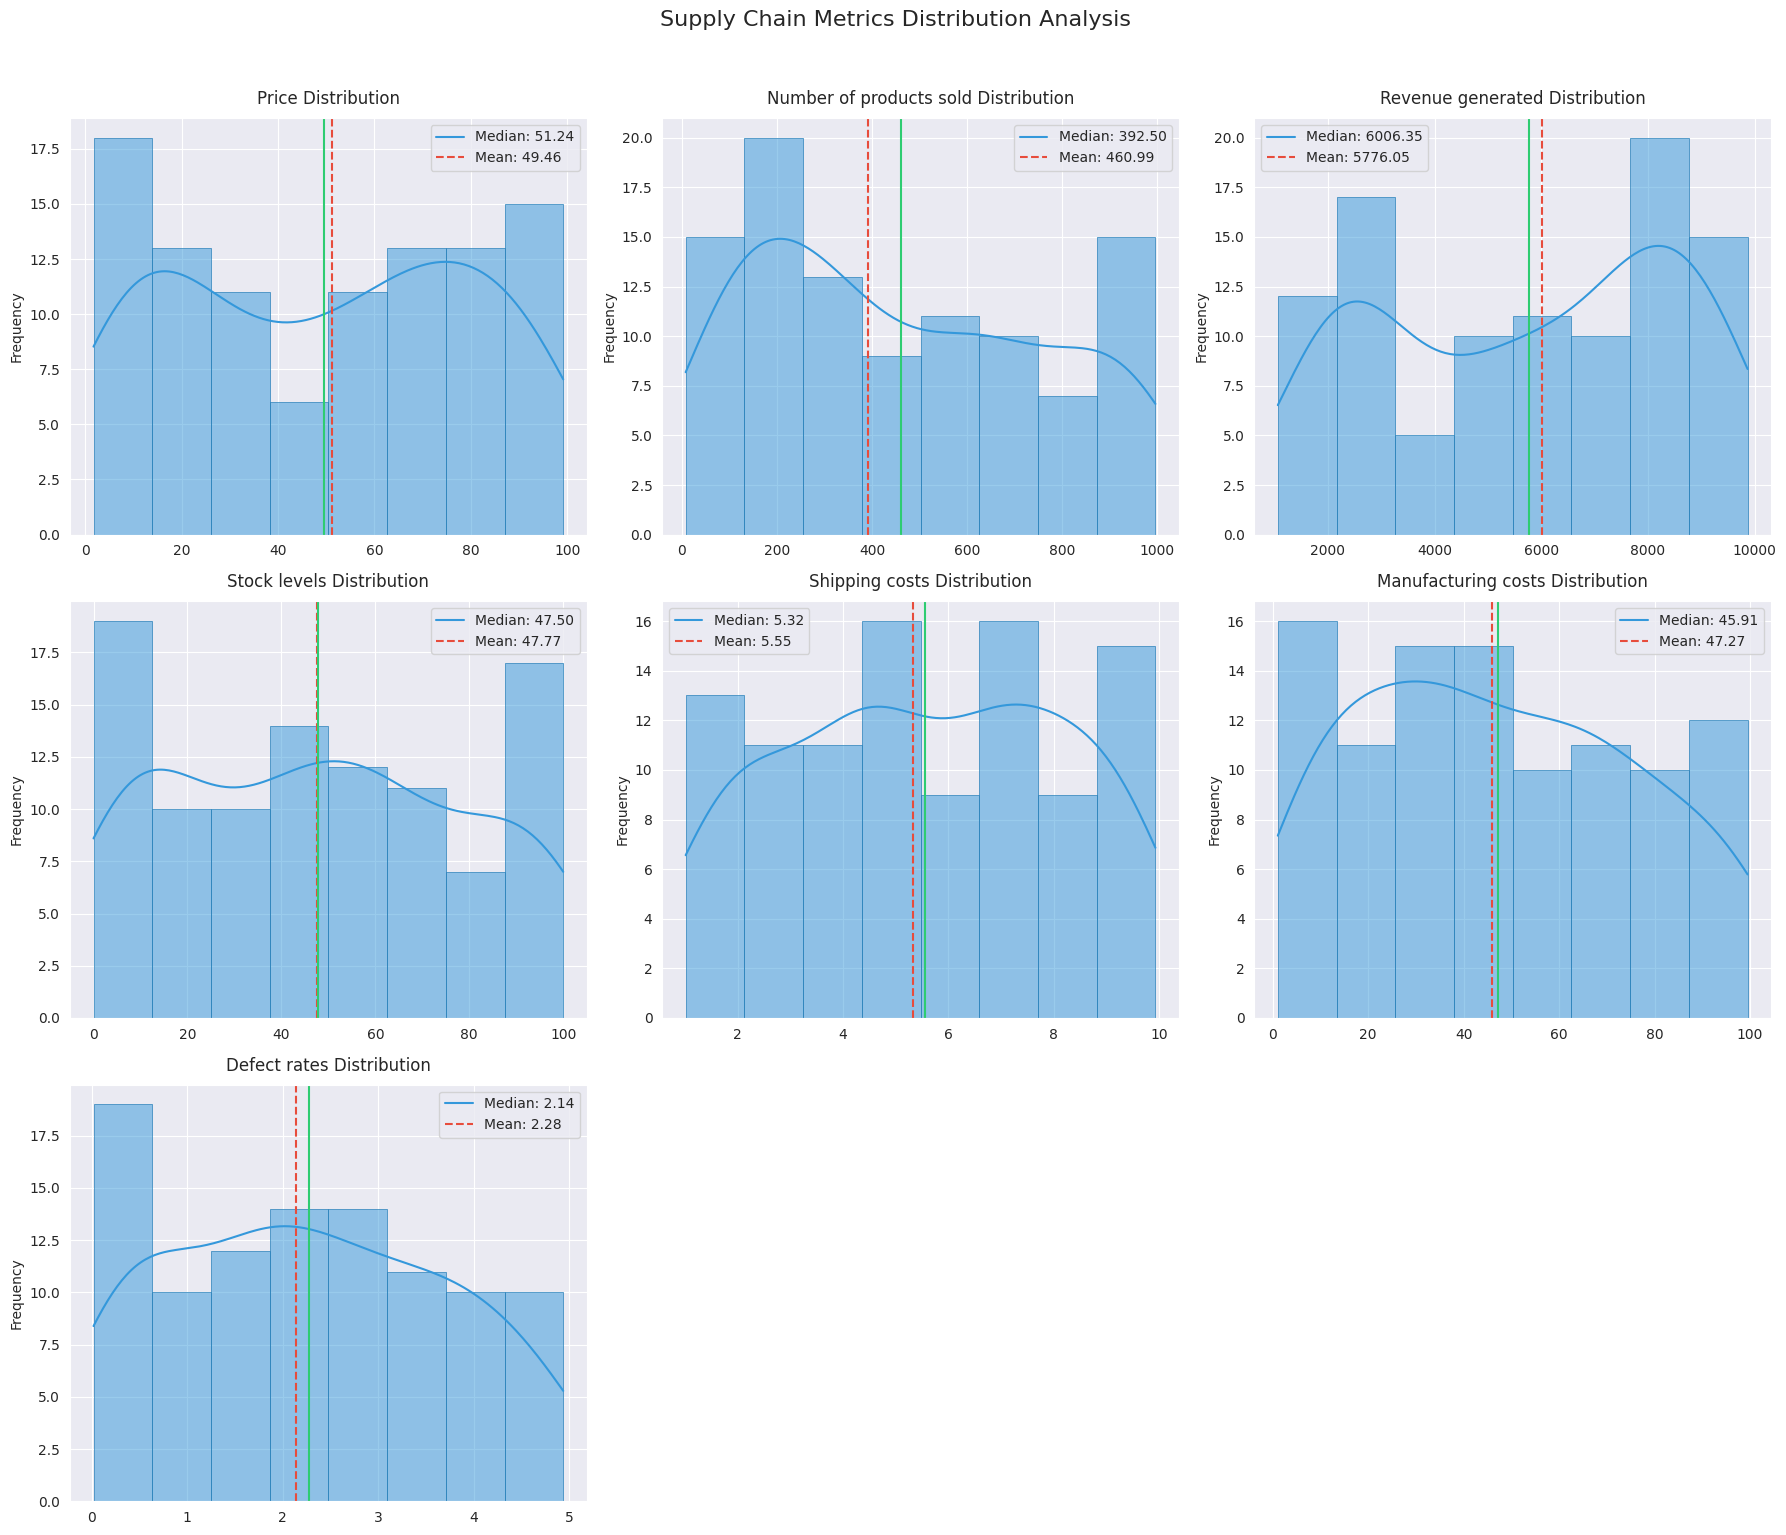

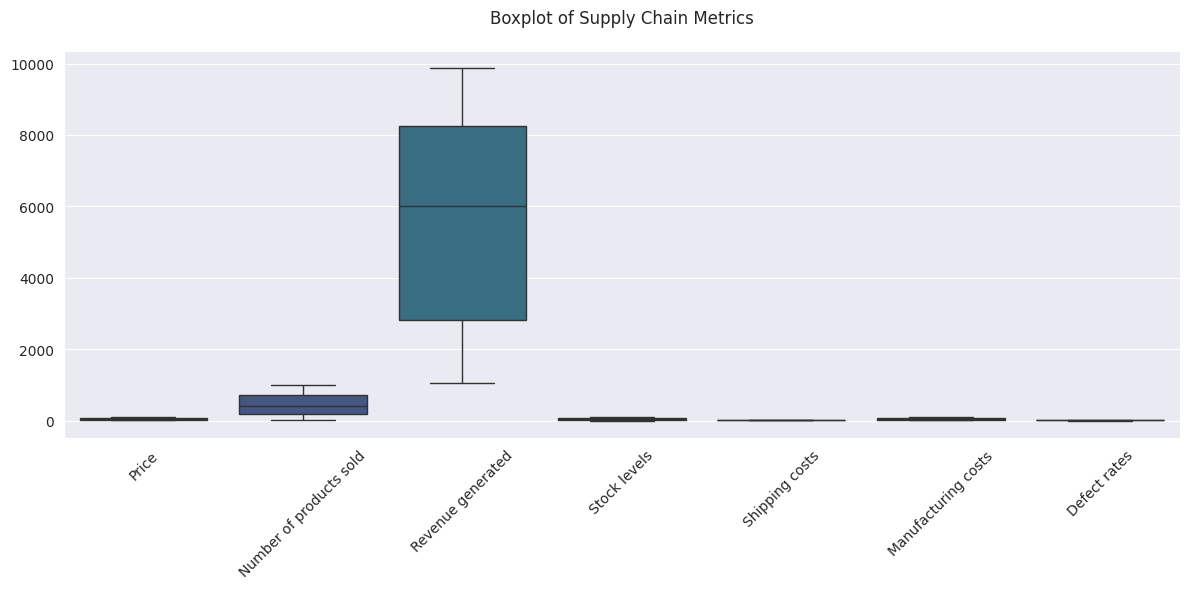

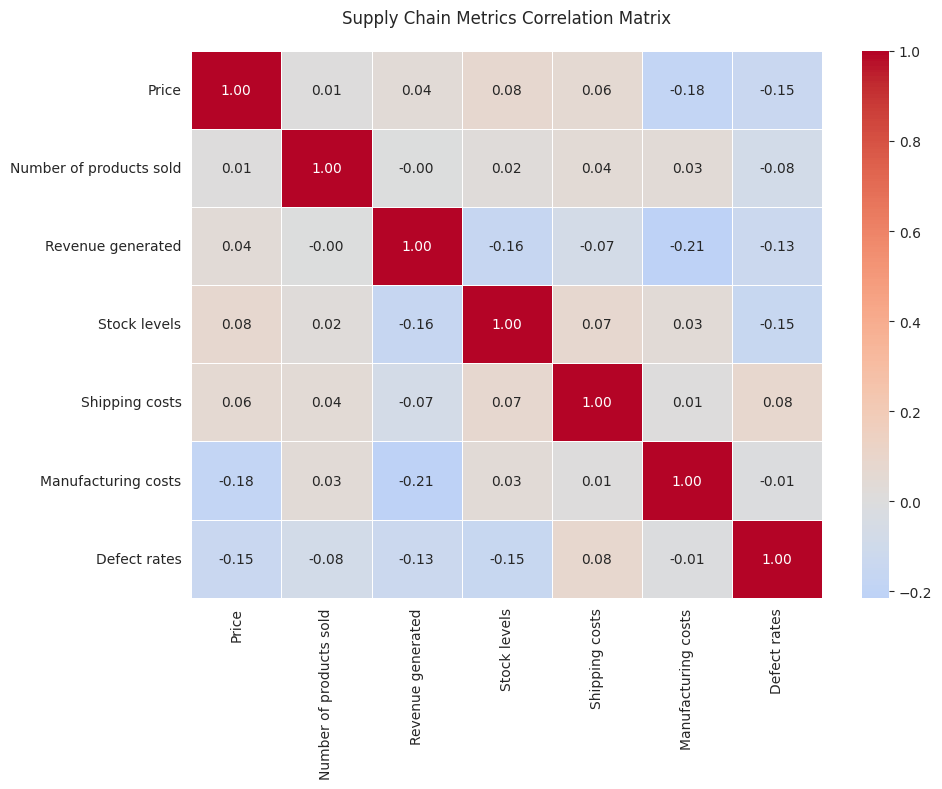

In [43]:
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = 'white'

# Select numerical columns for visualization
numeric_cols = ['Price', 'Number of products sold', 'Revenue generated',
                'Stock levels', 'Shipping costs', 'Manufacturing costs',
                'Defect rates']

# Create subplots with dynamic sizing
n_cols = 3
n_rows = len(numeric_cols) // n_cols + (1 if len(numeric_cols) % n_cols != 0 else 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

# Plot distributions with enhanced features
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(df[col], ax=ax, kde=True, color='#3498db',
                 edgecolor='#2980b9', linewidth=0.5)

    # Add statistical annotations
    median = df[col].median()
    mean = df[col].mean()
    ax.axvline(median, color='#e74c3c', linestyle='--', linewidth=1.5)
    ax.axvline(mean, color='#2ecc71', linestyle='-', linewidth=1.5)

    ax.set_title(f'{col} Distribution', fontsize=12, pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency', fontsize=10)

    # Add legend
    ax.legend([f'Median: {median:.2f}', f'Mean: {mean:.2f}'])

# Hide empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Supply Chain Metrics Distribution Analysis', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Additional: Boxplot analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], palette='viridis')
plt.title('Boxplot of Supply Chain Metrics', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation analysis
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            center=0, linewidths=0.5, fmt='.2f')
plt.title('Supply Chain Metrics Correlation Matrix', pad=20)
plt.tight_layout()
plt.show()

Frequency distribution for categorical values

In [44]:
# Frequency distribution for categorical variables
categorical_variables = ['Product type', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']
frequency_distribution = {}

for col in categorical_variables:
    frequency_distribution[col] = df[col].value_counts()

print("\nFrequency Distribution for Categorical Variables:")
for col, freq_dist in frequency_distribution.items():
    print(f"\n{col}:")
    print(freq_dist)


Frequency Distribution for Categorical Variables:

Product type:
Product type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

Customer demographics:
Customer demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

Shipping carriers:
Shipping carriers
Carrier B    43
Carrier C    29
Carrier A    28
Name: count, dtype: int64

Supplier name:
Supplier name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64

Location:
Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64

Inspection results:
Inspection results
Pending    41
Fail       36
Pass       23
Name: count, dtype: int64

Transportation modes:
Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

Routes:
Routes
Route A    43
Route B    37
Route C    20
Name: count, dtype: int64


In [45]:
!pip install tabulate

In [46]:
import pandas as pd
from tabulate import tabulate

# Frequency distribution for categorical variables
categorical_variables = ['Product type', 'Customer demographics', 'Shipping carriers',
                        'Supplier name', 'Location', 'Inspection results',
                        'Transportation modes', 'Routes']

print("\nFrequency Distribution for Categorical Variables:")

for col in categorical_variables:
    # Calculate frequency distribution
    freq_dist = df[col].value_counts().reset_index()
    freq_dist.columns = [col, 'Count']

    # Calculate percentage
    freq_dist['Percentage'] = (freq_dist['Count'] / freq_dist['Count'].sum() * 100).round(2)

    # Print table with borders
    print(f"\n{col.upper()} DISTRIBUTION:")
    print(tabulate(freq_dist, headers='keys', tablefmt='grid', showindex=False))
    print(f"\nTotal: {freq_dist['Count'].sum()} records")


Frequency Distribution for Categorical Variables:

PRODUCT TYPE DISTRIBUTION:
+----------------+---------+--------------+
| Product type   |   Count |   Percentage |
+================+=========+==============+
| skincare       |      40 |           40 |
+----------------+---------+--------------+
| haircare       |      34 |           34 |
+----------------+---------+--------------+
| cosmetics      |      26 |           26 |
+----------------+---------+--------------+

Total: 100 records

CUSTOMER DEMOGRAPHICS DISTRIBUTION:
+-------------------------+---------+--------------+
| Customer demographics   |   Count |   Percentage |
+=========================+=========+==============+
| Unknown                 |      31 |           31 |
+-------------------------+---------+--------------+
| Female                  |      25 |           25 |
+-------------------------+---------+--------------+
| Non-binary              |      23 |           23 |
+-------------------------+---------+-------

<ipython-input-47-05ade3d2a6dc>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate for readability
<ipython-input-47-05ade3d2a6dc>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate for readability
<ipython-input-47-05ade3d2a6dc>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate for readability
<ipython-input-47-05ade3d2a6dc>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="ri

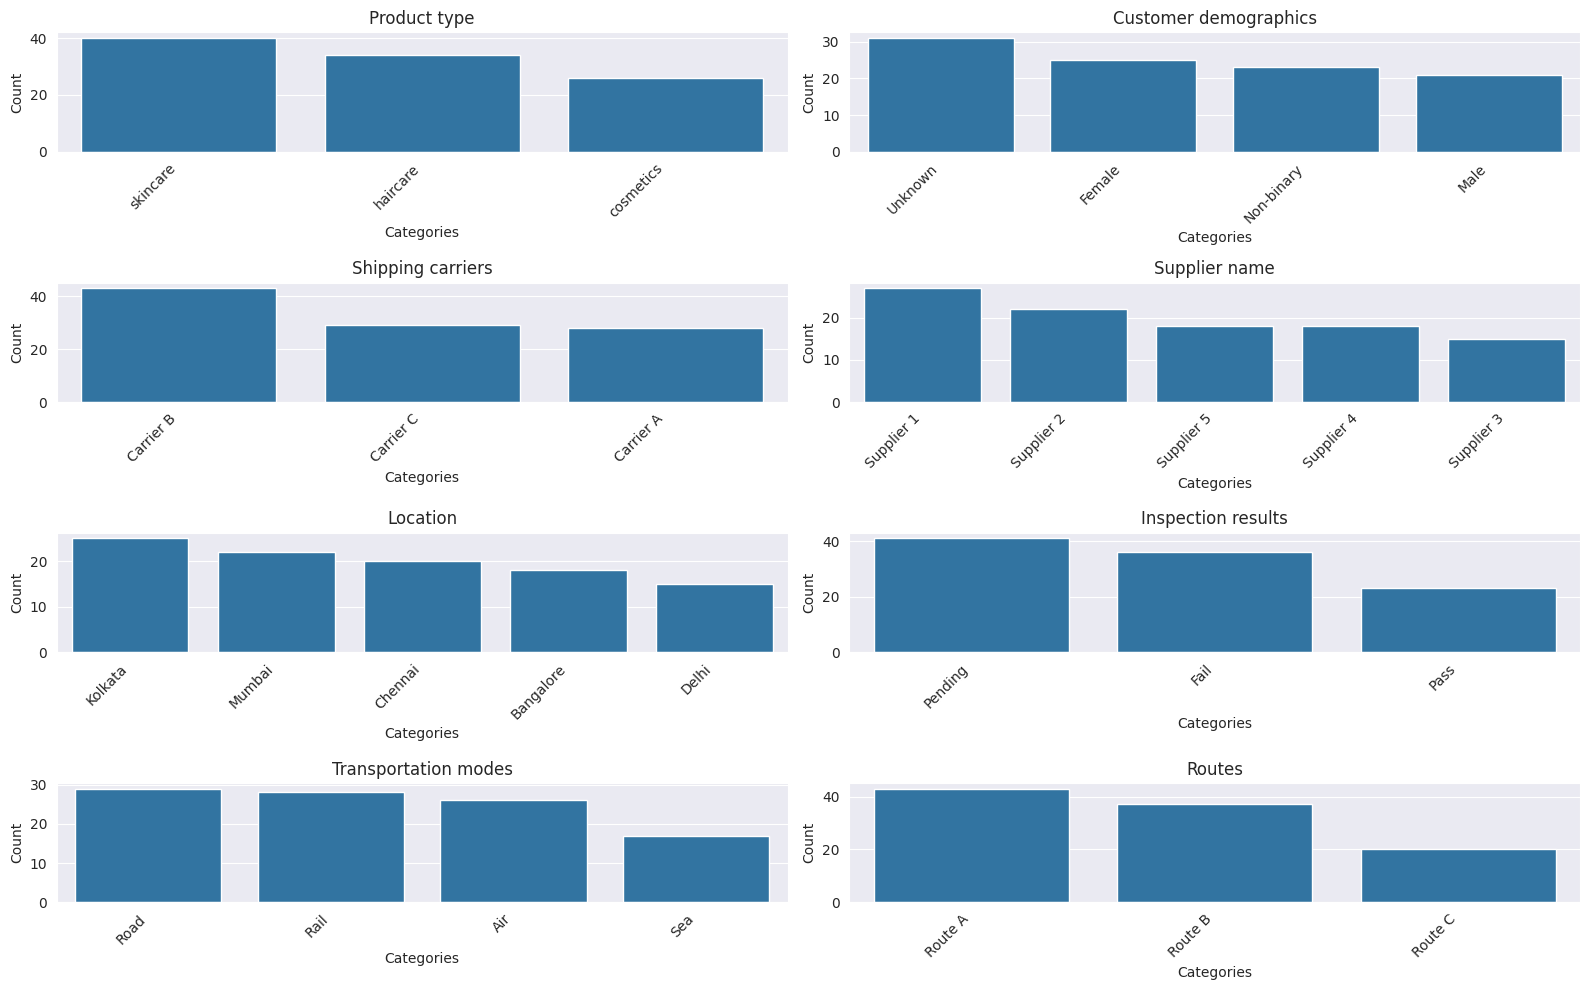

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming categorical_variables is a list of categorical columns
num_plots = len(categorical_variables)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows in the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))
axes = axes.flatten()

# Plot each categorical variable distribution
for i, col in enumerate(categorical_variables):
    if col in frequency_distribution:  # Ensure key exists in frequency_distribution
        freq_dist = frequency_distribution[col]
        ax = axes[i]
        sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax)
        ax.set_title(col)
        ax.set_xlabel("Categories")
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate for readability

# Hide empty subplots if any
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [48]:
df['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [50]:
print(df['Transportation modes'].unique(),
df['Routes'].unique(),
df['Customer demographics'].unique(),
df['Location'].unique())

['Road' 'Air' 'Rail' 'Sea'] ['Route B' 'Route C' 'Route A'] ['Non-binary' 'Female' 'Unknown' 'Male'] ['Mumbai' 'Kolkata' 'Delhi' 'Bangalore' 'Chennai']


In [51]:
fig = px.scatter(data,x='Price',y='Revenue generated',
                color='Product type',
                hover_data = ['Number of products sold'],
                trendline='ols')
fig.show()

In [52]:
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Number of products sold'].plot(kind='hist', bins=20, title='Number of products sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Product type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Number of products sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Number of products sold']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Number of products sold'}, axis=1)
              .sort_values('Number of products sold', ascending=True))
  xs = counted['Number of products sold']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Number of products sold', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Number of products sold')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Number of products sold'].plot(kind='line', figsize=(8, 4), title='Number of products sold')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Product type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Product type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Product type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Number of products sold', y='Product type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [53]:
pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type',
                  title='Sales by Product Type',
                  hover_data=['Number of products sold'],
                  hole=0.45,
                  color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition='inside',textinfo='percent')
pie_chart.show()

In [54]:
trans_data = data.groupby('Transportation modes')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(trans_data,values='Number of products sold', names='Transportation modes',
                  title='Sales by Product Type',
                  hover_data=['Number of products sold'],
                  hole=0.5,
#                   color_discrete_sequence=px.colors.qualitative.Pastel
                  )
pie_chart.update_traces(textposition='inside',textinfo='percent+label')
pie_chart.show()

In [55]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total revenue by shipping carrier',
                 xaxis_title='Shipping carrier',
                 yaxis_title='Revenue Generated')
fig.show()

In [56]:
total_revenue = data.groupby('Location')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Location'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on location',
                 xaxis_title='Locations',
                 yaxis_title='Revenue generated')
fig.show()

In [57]:
total_revenue = data.groupby('Transportation modes')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Transportation modes'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on location',
                 xaxis_title='Transportation modes',
                 yaxis_title='Revenue generated')
fig.show()

In [58]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_time = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time,avg_manufacturing_time, on ='Product type')
result.rename(columns={'Lead time':'Avg lead time','Manufacturing time':'Avg manufacturing time'}, inplace=True)
result

,Product type,Avg lead time,Manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


In [59]:
shipping_cost_chart = px.bar(data,x='Shipping carriers',
                            y='Shipping costs',
                            title='Shipping Costs by Carrier')
shipping_cost_chart.show()

In [60]:
transportation_chart = px.pie(data,
                             values='Costs',
                             names='Transportation modes',
                             title='Cost Distribution by Transportation Mode',
                             hole=0.5,
                             color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.update_traces(textposition='inside',textinfo='percent+label')
transportation_chart.show()

In [61]:
defect_rate_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rate_by_product, x='Product type', y='Defect rates',
             title='Average defect rates by product type')
fig.show()

In [62]:
trans = data.groupby('Transportation modes')['Defect rates'].mean().reset_index()

trans_chart = px.pie(trans,values='Defect rates',
                    names='Transportation modes',
                    title='Defect Rates by Transportation Mode',
                    hole=0.5,
                    color_discrete_sequence=px.colors.qualitative.Pastel)
trans_chart.update_traces(textposition='inside',textinfo='label+percent')
trans_chart.show()

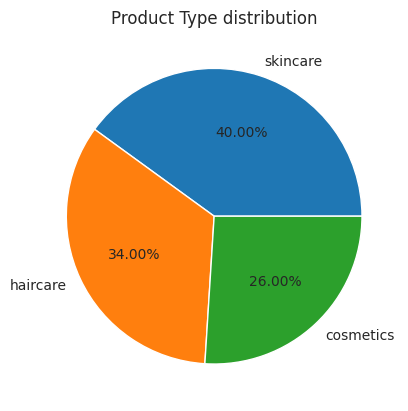

In [63]:
# Display product type distribution in the dataset.
pie_labels = data['Product type'].value_counts().index.to_list()
plt.pie(data['Product type'].value_counts(), autopct="%.2f%%", labels = pie_labels);
plt.title ("Product Type distribution");

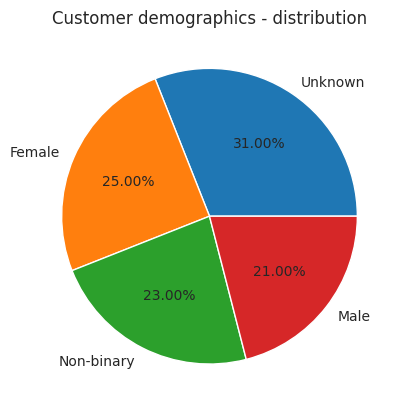

In [64]:
# Draw a plot for Customer demograohics
gender_labels = data['Customer demographics'].value_counts().index.to_list()
plt.pie(data['Customer demographics'].value_counts(), labels=gender_labels, autopct="%.2f%%");
plt.title("Customer demographics - distribution");

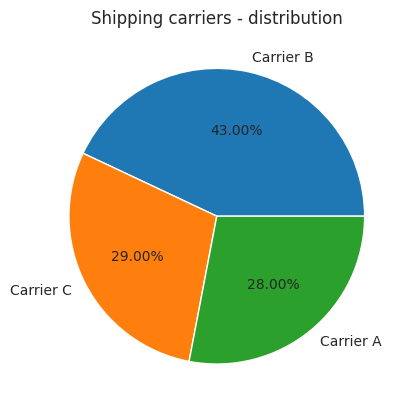

In [65]:
# Draw pie chart
carrier_labels = data['Shipping carriers'].value_counts().index.to_list()
plt.pie(data['Shipping carriers'].value_counts(), labels=carrier_labels, autopct="%.2f%%");
plt.title('Shipping carriers - distribution');

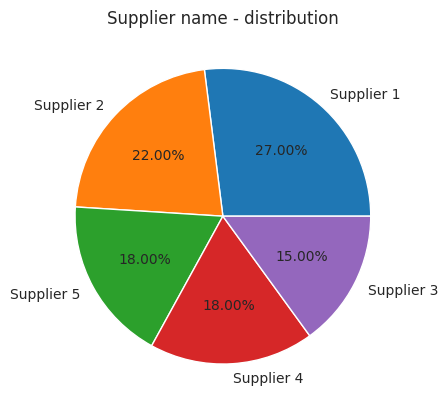

In [66]:
supplier_labels = data['Supplier name'].value_counts().index.to_list();
plt.pie(data['Supplier name'].value_counts(), labels=supplier_labels, autopct="%.2f%%");
plt.title('Supplier name - distribution');

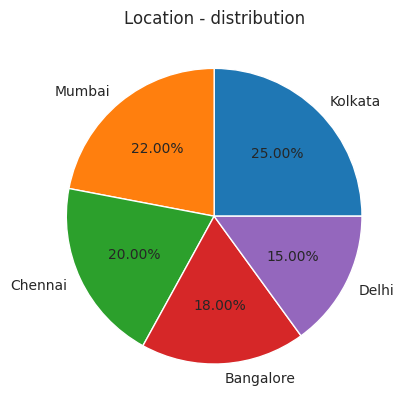

In [67]:
location_labels = data['Location'].value_counts().index.to_list()
plt.pie(data['Location'].value_counts(), labels=location_labels, autopct="%.2f%%");
plt.title ("Location - distribution");

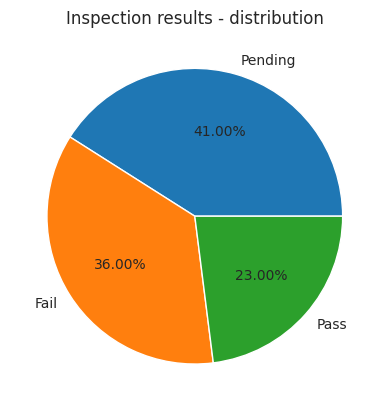

In [68]:
inspection_results_labels=data['Inspection results'].value_counts().index.to_list()

# Draw Pie chart
plt.pie(data['Inspection results'].value_counts(), labels=inspection_results_labels, autopct="%.2f%%");
plt.title("Inspection results - distribution");

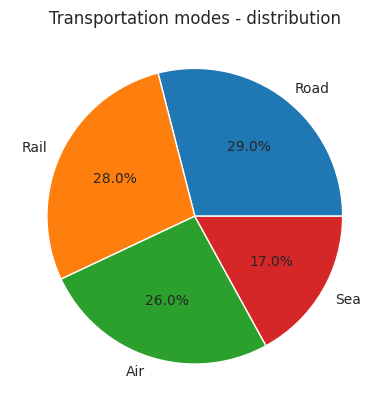

In [69]:
transportation_modes_labels=data['Transportation modes'].value_counts().index.to_list();

plt.pie(data['Transportation modes'].value_counts(), labels=transportation_modes_labels, autopct="%1.1f%%");
plt.title("Transportation modes - distribution");

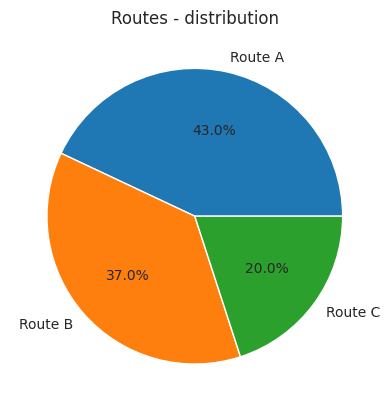

In [70]:
route_labels = data['Routes'].value_counts().index.to_list()

#Draw pie
plt.pie(data['Routes'].value_counts(), labels=route_labels, autopct="%1.1f%%");
plt.title("Routes - distribution");

High demand Products

In [74]:
df[['Product type','SKU','Location','Number of products sold']].sort_values('Number of products sold', ascending=False).head(5)

,Product type,SKU,Location,Number of products sold
10,skincare,SKU10,Kolkata,996
94,cosmetics,SKU94,Delhi,987
9,skincare,SKU9,Chennai,980
36,skincare,SKU36,Delhi,963
37,skincare,SKU37,Kolkata,963


Low demand products

In [76]:

data[["Product type","SKU","Number of products sold"]].sort_values("Number of products sold").head(5)

,Product type,SKU,Number of products sold
2,haircare,SKU2,8
45,haircare,SKU45,24
85,cosmetics,SKU85,25
48,haircare,SKU48,29
70,haircare,SKU70,32


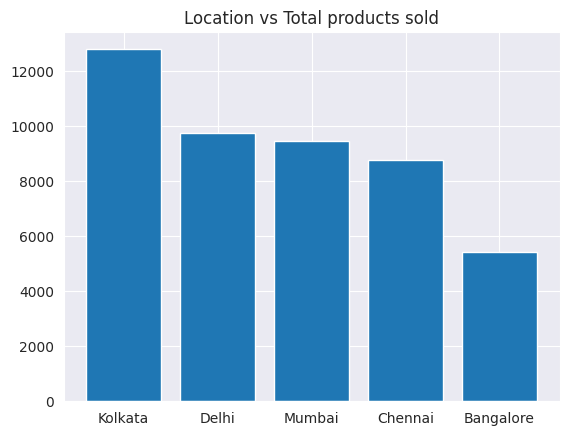

In [77]:
# Extract required fields to seperate data frame
df_loc_product_sell = data[["Location", "Number of products sold"]].copy()

#Group by location and include sum for each location groups
df_loc_product_sell=df_loc_product_sell.groupby('Location').sum()

# Rename the sum field
df_loc_product_sell.rename(columns={'Number of products sold':"SoldProducts"}, inplace=True)

# Sort the rows based on the sum of Sold products
df_loc_product_sell.sort_values(by="SoldProducts",ascending=False, inplace=True)

# Draw the bar graph
plt.bar(df_loc_product_sell.index, df_loc_product_sell['SoldProducts']);
plt.title("Location vs Total products sold");

💡Kolkata is a place having large selling market.
💡Delhi, Mumbai and Chennai is having almost similar market.
💡Bangalore having lowest selling of products.
 Companies needs to be understand why this city having less selling eventhough it's major city in the country.
💡Does any more campaigns or advertisements is required for drawing the customers attention ?

Average sold in each location by each products

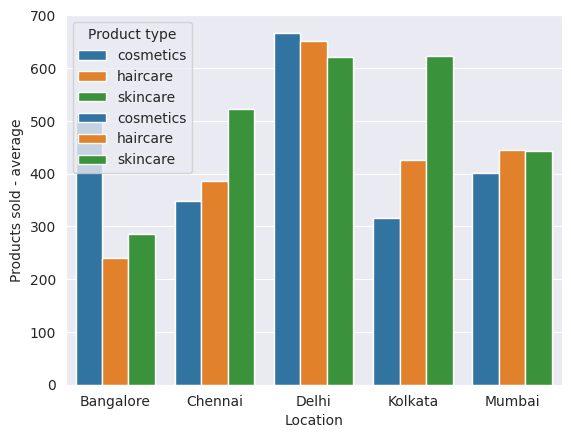

In [78]:
# Create seperate data frame with product type, number of products sold and location
df_product_type_location = data[["Product type","Location", "Number of products sold"]].copy()

# Find the mean value of 'Number of Products sold'
df_product_type_location = df_product_type_location.groupby(["Location","Product type"]).mean()

# Rename the mean value column
df_product_type_location.rename({"Number of products sold":"Products sold - average"},axis = 1, inplace=True)

# Reset the index
df_product_type_location.reset_index(inplace=True)

#Draw the bar graph
sns.barplot(data=df_product_type_location,
            x="Location",
            y="Products sold - average",
            hue="Product type");

💡 Delhi is the location having highest average products sold for 3 product types.

Product type with more defects

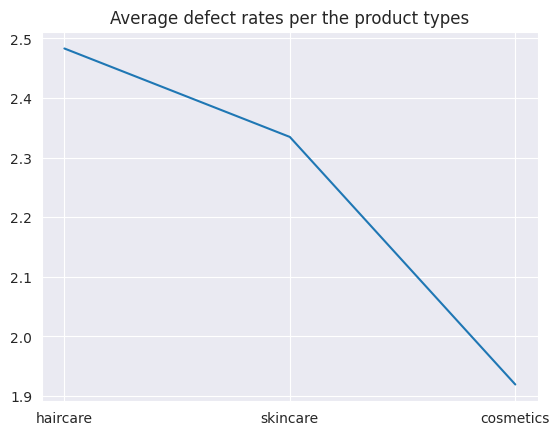

In [79]:
df_product_type_defect= data[['Product type','Defect rates']].copy()

#Group by product types
df_product_type_defect = df_product_type_defect.groupby('Product type').mean()

# Rename the Defect rates column
df_product_type_defect.rename(columns={'Defect rates':'Average defect rates'}, inplace=True)

# Sort the Average defect rates column
df_product_type_defect.sort_values(by="Average defect rates", ascending=False, inplace=True)

# Plot the line graph
plt.plot(df_product_type_defect);
plt.title("Average defect rates per the product types");

💡 Average defect rates of hair care products are higher compared to skincare and cosmetics.

**Transporatation cost**
What are the average costs of each transportation modes ?
Which transportation having less costs ?

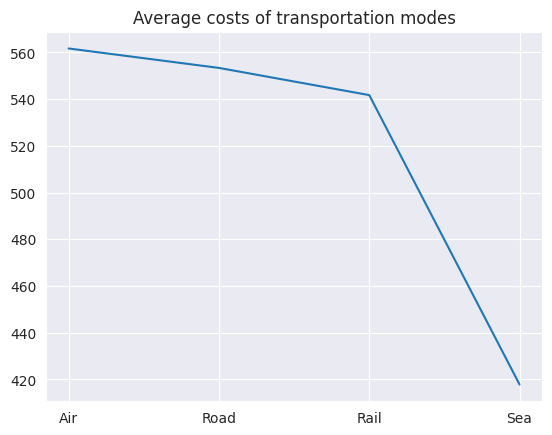

In [80]:
# Create a seperate data frame for Transportation cost analysis
df_transport_cost = data[["Product type", "Transportation modes", "Costs"]].copy()

# Segregate records based on the Transportation modes and find mean of each group
df_transport_cost = df_transport_cost.groupby('Transportation modes').mean('Costs')

# rename the mean field
df_transport_cost.rename(columns={"Costs":"Avg Costs"}, inplace=True)

#Sort the records based on the mean cost value
df_transport_cost.sort_values(by="Avg Costs",ascending=False, inplace=True)

# Visualize the average values of each transportation
plt.plot(df_transport_cost);
plt.title ("Average costs of transportation modes");

💡 From this dataset, its clear that Sea transport is cost budget friendly than rail, road and air.
💡 As per our general understanding speed will be higher in air, hence the cost also will be higher.
💡 Rail transport stays in between high and low budget rates.
💡 We can decide the transport based on the urgency and cost efficiency.

In [9]:
# from google.colab import files
# uploaded = files.upload()  # Opens a file picker
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['supply_chain_data.csv']))
print(data.head())


  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

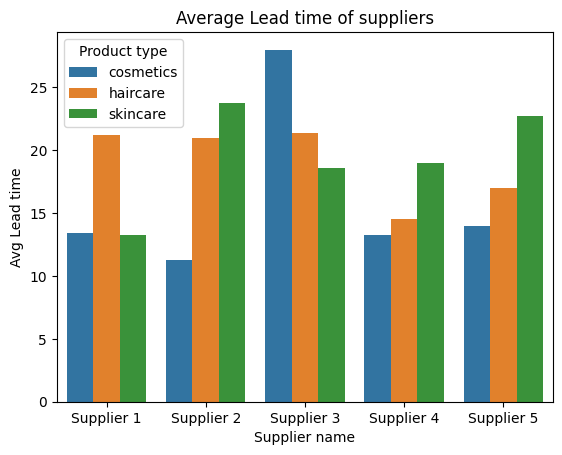

In [14]:

# Create new data frame
df_supplier_product_type = data[['Product type', 'Supplier name', 'Lead time']].copy()

# Group the columns based on the supplier name , product type and find the mean of 'lead time' of each sub group.
df_supplier_product_type = df_supplier_product_type.groupby(['Supplier name', 'Product type']).mean('Lead time')

# Rename the mean column of Lead time
df_supplier_product_type.rename(columns={'Lead time':'Avg Lead time'}, inplace=True)

#Reset the index
df_supplier_product_type.reset_index(inplace=True);

#Draw the bar graph
sns.barplot(data=df_supplier_product_type,
            x="Supplier name",
            y="Avg Lead time",
            hue="Product type"). set_title("Average Lead time of suppliers");

💡 From above graph, we can compare the time required to supply each product type from various suppliers.
💡 For instance, Supplier 3 takes highest time in supplying 'Cosmetics' item than any other supplier. So as a business we may re-think before ordering Cosmetics item from supplier 3

Product and Customer Analysis

Trend Analysis by Product Type

In [17]:
from functools import total_ordering
# Calculate Total Revenue by Product Type
total_revenue_by_product_type = data.groupby('Product type')['Revenue generated'].sum().reset_index()
total_revenue_by_product_type

,Product type,Revenue generated
0,cosmetics,161521.265999
1,haircare,174455.390606
2,skincare,241628.162133


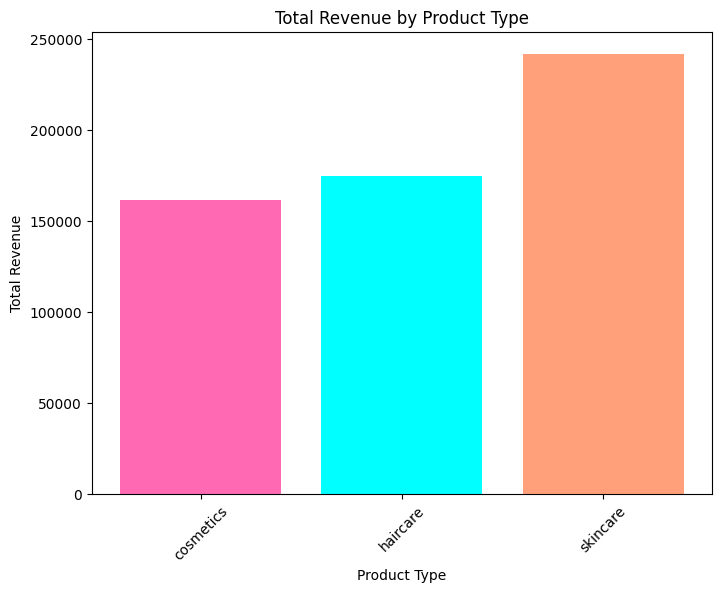

In [20]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # Import mcolors


# Define custom colors for product type
# Use Matplotlib's color names or hex codes
my_colors = {'cosmetics': 'hotpink', 'haircare': mcolors.CSS4_COLORS['cyan'], 'skincare': 'lightsalmon'}

# # Calculate Total Revenue by Product Type
# total_revenue_by_product_type = df.groupby('Product type')['Revenue generated'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(total_revenue_by_product_type['Product type'], total_revenue_by_product_type['Revenue generated'], color=total_revenue_by_product_type['Product type'].map(my_colors))
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


Average Stock level by product type

In [23]:
# Calculate Average Stock Level by Product Type
average_stock_level = data.groupby('Product type')['Stock levels'].mean().reset_index()
average_stock_level

# # Create the bar plot
# plt.figure(figsize=(8, 6))
# plt.barh(average_stock_level['Product type'], average_stock_level['Stock levels'], color=average_stock_level['Product type'].map(my_colors))
# plt.title('Average Stock Levels (Unit)')
# plt.xlabel('Average Stock Level')
# plt.ylabel('Product Type')
# plt.show()

,Product type,Stock levels
0,cosmetics,58.653846
1,haircare,48.352941
2,skincare,40.200000


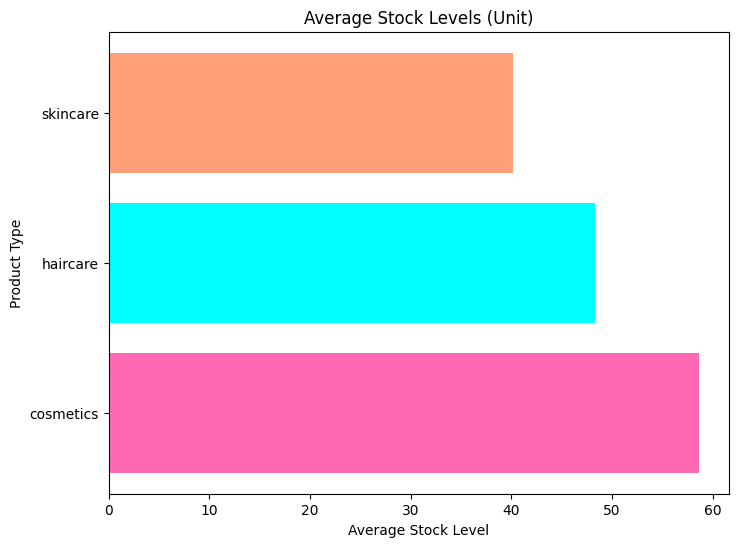

In [24]:
# Calculate Average Stock Level by Product Type
average_stock_level = data.groupby('Product type')['Stock levels'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.barh(average_stock_level['Product type'], average_stock_level['Stock levels'], color=average_stock_level['Product type'].map(my_colors))
plt.title('Average Stock Levels (Unit)')
plt.xlabel('Average Stock Level')
plt.ylabel('Product Type')
plt.show()

In [26]:
# Calculate Average Lead Times by Product Type
average_lead_times = data.groupby('Product type')['Lead times'].mean().reset_index()
average_lead_times


,Product type,Lead times
0,cosmetics,15.384615
1,haircare,15.529412
2,skincare,16.700000


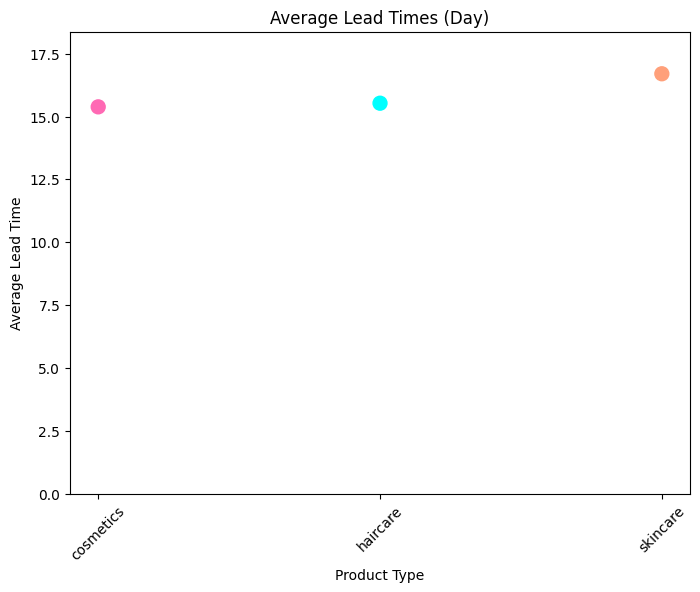

In [25]:
# Calculate Average Lead Times by Product Type
average_lead_times = data.groupby('Product type')['Lead times'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_lead_times['Product type'], average_lead_times['Lead times'], color=average_lead_times['Product type'].map(my_colors), s=100)  # Adjust point size as needed
plt.title('Average Lead Times (Day)')
plt.xlabel('Product Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.ylim(0, average_lead_times['Lead times'].max() * 1.1)  # Adjust y-axis limits
plt.show()

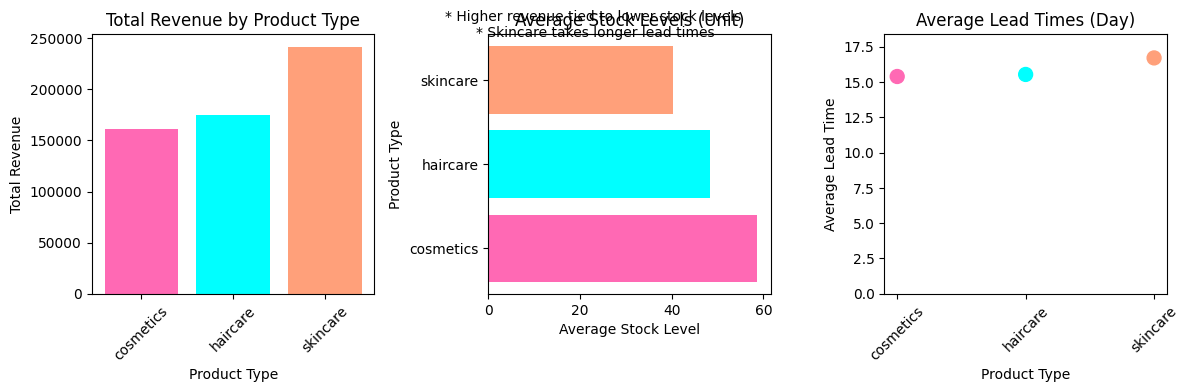

In [27]:
# Calculate Total Revenue by Product Type
total_revenue_by_product_type = data.groupby('Product type')['Revenue generated'].sum().reset_index()

# Calculate Average Stock Level by Product Type
average_stock_level = data.groupby('Product type')['Stock levels'].mean().reset_index()

# Calculate Average Lead Times by Product Type
average_lead_times = data.groupby('Product type')['Lead times'].mean().reset_index()

# Create the first subplot (Total Revenue)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(total_revenue_by_product_type['Product type'], total_revenue_by_product_type['Revenue generated'], color=total_revenue_by_product_type['Product type'].map(my_colors))
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Create the second subplot (Average Stock Level)
plt.subplot(1, 3, 2)
plt.barh(average_stock_level['Product type'], average_stock_level['Stock levels'], color=average_stock_level['Product type'].map(my_colors))
plt.title('Average Stock Levels (Unit)')
plt.xlabel('Average Stock Level')
plt.ylabel('Product Type')

# Create the third subplot (Average Lead Times)
plt.subplot(1, 3, 3)
plt.scatter(average_lead_times['Product type'], average_lead_times['Lead times'], color=average_lead_times['Product type'].map(my_colors), s=100)
plt.title('Average Lead Times (Day)')
plt.xlabel('Product Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.ylim(0, average_lead_times['Lead times'].max() * 1.1)

# Add a text annotation
plt.figtext(0.5, 0.9, "* Higher revenue tied to lower stock levels \n* Skincare takes longer lead times", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Using Liner regression to analyse how Availability interacts with Price, Number of Products Sold, and Lead Times offers strategic insights for inventory management and forecasting, beneficial even when historical sales data is not available.

In [28]:
import pandas as pd
import statsmodels.api as sm

# Create the linear regression model
X = data[['Price', 'Number of products sold', 'Lead times']]
X = sm.add_constant(X)  # Add a constant term
y = data['Availability']

model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Availability   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.274
Date:                Mon, 05 May 2025   Prob (F-statistic):              0.288
Time:                        00:25:10   Log-Likelihood:                -482.01
No. Observations:                 100   AIC:                             972.0
Df Residuals:                      96   BIC:                             982.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

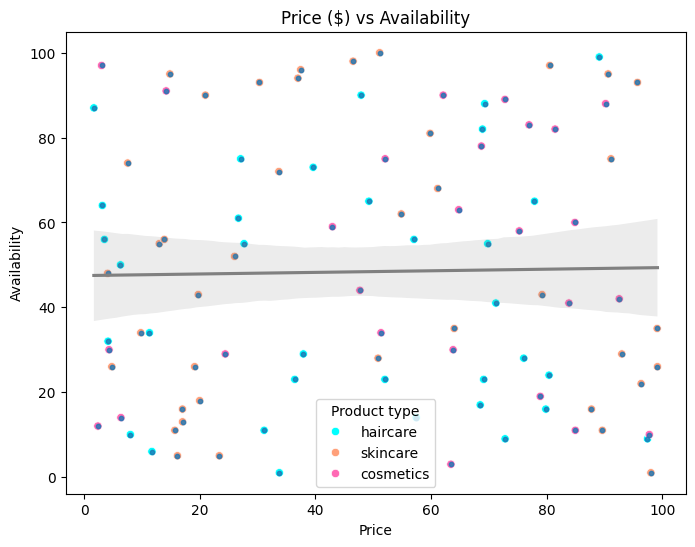

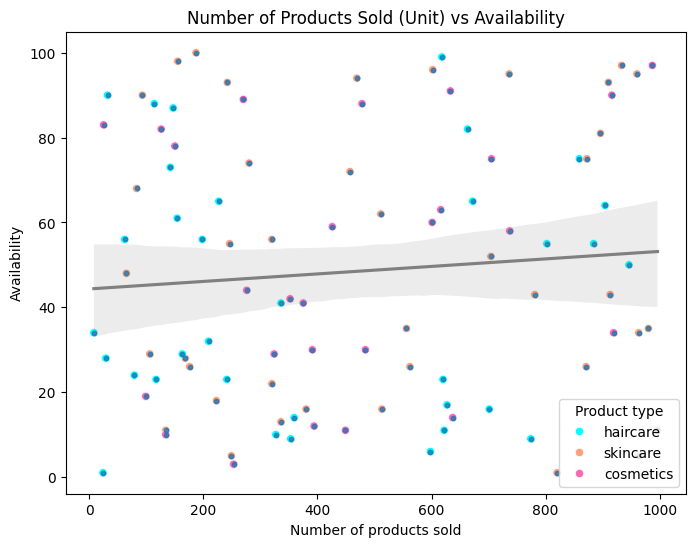

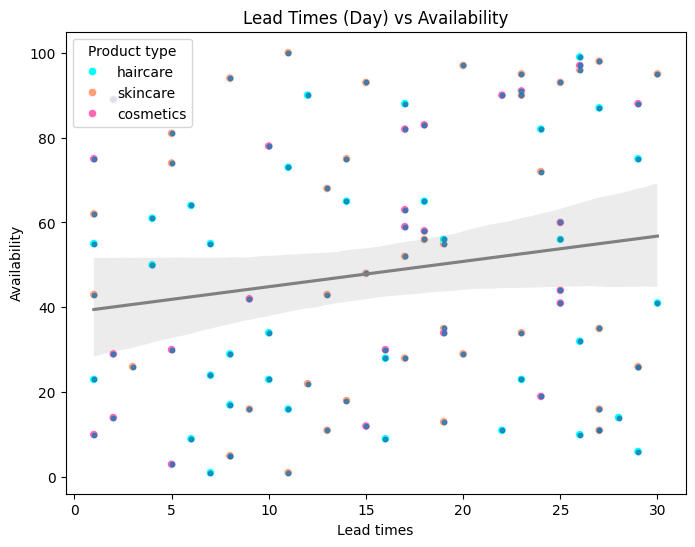

In [29]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Availability', hue='Product type', data=data, palette=my_colors)
sns.regplot(x='Price', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Price ($) vs Availability')
plt.show()

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number of products sold', y='Availability', hue='Product type', data=data, palette=my_colors)
sns.regplot(x='Number of products sold', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Number of Products Sold (Unit) vs Availability')
plt.show()

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Lead times', y='Availability', hue='Product type', data=data, palette=my_colors)
sns.regplot(x='Lead times', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Lead Times (Day) vs Availability')
plt.show()